In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json
import matplotlib as mpl
from cycler import cycler

wong_colors = {
    "red": "#D55E00",
    "dark_blue": "#0072B2",
    "orange": "#E69F00",
    "purple": "#CC79A7",
    "light_blue": "#56B4E9",
    "green": "#009E73",
    "black": "#000000",
    "yellow": "#F0E442",
}

wong_cycle = cycler(color=[color for color in wong_colors.values()])

mpl.rcParams["axes.prop_cycle"] = wong_cycle
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = "Arial",
mpl.rcParams["axes.titleweight"] = "bold"
mpl.rcParams["axes.labelweight"] = "bold"
# mpl.rcParams["figure.autolayout"]  True
mpl.rcParams["figure.constrained_layout.use"] = True

In [3]:
with open("../data/formation_energies.json", "r") as f:
    macrocycles = json.load(f)

mols = [n for n in macrocycles.keys()]

In [4]:
functionals =[
    # 'B97-3c',
    'M06-2X',
    'PBE0',
    'PW6B95',
    'ωB97M-V',
    'ωB97X-D3',
    'ωB97X-V'
]

def _get_energies(e_label, smd):
    energies = {f: []for f in functionals}
    for mol in mols:
        for funct, es in macrocycles[mol].items():
            if not smd:
                # if funct == "B97-3c (Eh)":
                #     energies["B97-3c"].append(es[e_label])
                if funct == "PBE0-D3BJ/def2-QZVP":
                    energies["PBE0"].append(es[e_label])
                elif funct == "PW6B95-D3BJ/def2-QZVP":
                    energies["PW6B95"].append(es[e_label])
                elif funct == "M062X-D3ZERO/def2-QZVP":
                    energies["M06-2X"].append(es[e_label])
                elif funct == "wB97X-D3BJ/def2-QZVP":
                    energies["ωB97X-D3"].append(es[e_label])
                elif funct == "wB97X-V/def2-QZVP":
                    energies["ωB97X-V"].append(es[e_label])
                elif funct == "wB97M-V/def2-QZVP":
                    energies["ωB97M-V"].append(es[e_label])
            else:
                # if funct == "B97-3c (Eh)":
                #     energies["B97-3c"].append(es[e_label])
                if funct == "PBE0-D3BJ-CHLOROFORM/def2-QZVP":
                    energies["PBE0"].append(es[e_label])
                elif funct == "PW6B95-D3BJ-CHLOROFORM/def2-QZVP":
                    energies["PW6B95"].append(es[e_label])
                elif funct == "M062X-D3ZERO-CHLOROFORM/def2-QZVP":
                    energies["M06-2X"].append(es[e_label])
                elif funct == "wB97X-D3BJ-CHLOROFORM/def2-QZVP":
                    energies["ωB97X-D3"].append(es[e_label])
                elif funct == "wB97X-V-CHLOROFORM/def2-QZVP":
                    energies["ωB97X-V"].append(es[e_label])
                elif funct == "wB97M-V-CHLOROFORM/def2-QZVP":
                    energies["ωB97M-V"].append(es[e_label])
    return energies


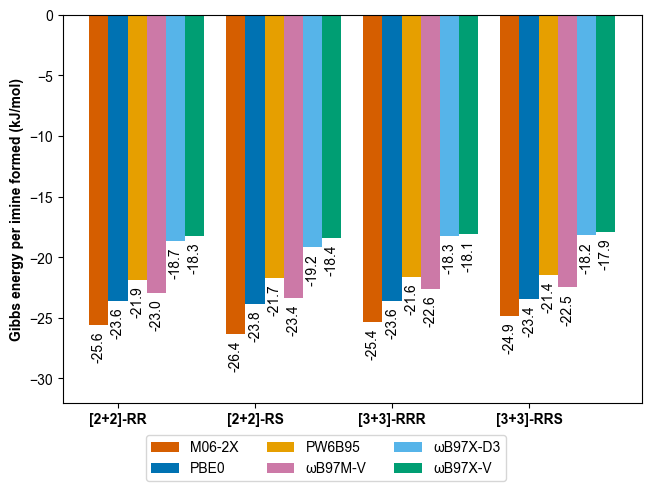

In [7]:
energies = _get_energies(e_label="Formation Gibbs energy per imine, sn=1 (kJ/mol)", smd=True)

x = np.arange(len(mols))
width = 0.14
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for functional, energy in energies.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, energy, width, label=functional)
    z = ax.bar_label(rects, padding=4, rotation=90, size=10, fmt="%.1f")
    multiplier += 1

ax.set_ylabel('Gibbs energy per imine formed (kJ/mol)')
# ax.set_title('DFT Formation Energies\nSMD=Chloroform, Symmetry number = 1')
ax.set_xticks(x + width, mols, weight="bold")
fig.legend(loc="outside lower center", ncols=3)
ax.set_ylim(-32, 0)

plt.savefig("formation_gibbs_energy.pdf")
plt.savefig("formation_gibbs_energy.svg")
plt.savefig("formation_gibbs_energy.png")